## Dissertation Pilot 1
How does effort cost vary over probability of switching in a sequence of cued task switching?

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
current_data <- read.csv('../data/dissertationPilot.csv')
head(current_data)

X,subject,procedure,pSwitch,stim,trial,taskcode,transition,rt
1,2,cuedproc,0.2,8,2,mag,Rep,754
2,2,cuedproc,0.2,3,3,mag,Rep,722
3,2,cuedproc,0.2,1,4,mag,Rep,635
4,2,cuedproc,0.2,2,5,mag,Rep,681
5,2,cuedproc,0.2,7,6,mag,Rep,620
6,2,cuedproc,0.2,3,7,mag,Rep,738


In [9]:
## compute switch costs by pSwitch
switchCosts <- current_data %>% 
group_by(subject, transition, pSwitch) %>% 
summarize(rt = mean(rt)) %>% 
spread(transition, rt) %>% 
mutate(switchCost = Switch - Rep) %>% 
select(-Rep, -Switch)
head(switchCosts)

subject,pSwitch,switchCost
2,0.0,548.5200
2,0.1,302.2541
2,0.2,134.1093
2,0.3,149.5492
2,0.4,166.6743
2,0.5,112.5882


Warning message:
“Removed 2 rows containing missing values (geom_path).”

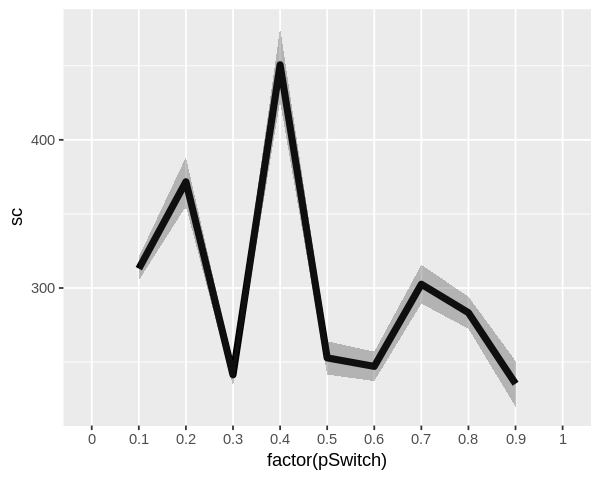

In [25]:
options(repr.plot.height = 4, repr.plot.width = 5)
switchCosts %>% 
group_by(pSwitch) %>% 
summarize(sc = mean(switchCost), se = sd(switchCost) / n()) %>% 
ggplot(aes(x = factor(pSwitch), y = sc, group = 1)) + geom_line(size = 2) + 
geom_ribbon(aes(ymin = sc - se, ymax = sc + se), alpha = .3) 